In [70]:
# Import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [71]:
# Read into the clean_data csv
bmi_df = pd.read_csv('../csv/clean_data.csv')
bmi_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,NO,1,28.73
1,6238,F,260.0,52,NO,0,2,NO,2,29.43
2,6238,F,237.0,58,NO,0,2,NO,3,28.50
3,11263,F,228.0,43,NO,0,2,NO,1,30.30
4,11263,F,230.0,49,NO,0,2,NO,2,31.36


In [72]:
# calculting the max value of BMI
max_bmi = bmi_df['BMI'].max()
max_bmi

56.8

In [73]:
# Establishing bins for BMI 
bins = [0, 18.5, 24.9, 29.9, max_bmi]
labels = ["Underweight", "Healthy Weight", "Overweight", "Obesity"]

In [74]:
# Categorizing BMI into the esbalished bins 
bmi_df["BMI CATEGORY"] = pd.cut(bmi_df["BMI"], bins, labels= labels)
bmi_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI,BMI CATEGORY
0,6238,F,250.0,46,NO,0,2,NO,1,28.73,Overweight
1,6238,F,260.0,52,NO,0,2,NO,2,29.43,Overweight
2,6238,F,237.0,58,NO,0,2,NO,3,28.50,Overweight
3,11263,F,228.0,43,NO,0,2,NO,1,30.30,Obesity
4,11263,F,230.0,49,NO,0,2,NO,2,31.36,Obesity


In [75]:
# Create new DataFrame for Period 1 only 
bmiP1_df = bmi_df [bmi_df['PERIOD']==1]
bmiP1_df.head()


,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI,BMI CATEGORY
0,6238,F,250.0,46,NO,0,2,NO,1,28.73,Overweight
3,11263,F,228.0,43,NO,0,2,NO,1,30.30,Obesity
6,14367,M,260.0,52,NO,0,1,NO,1,26.36,Overweight
9,16365,M,225.0,43,YES,30,1,NO,1,23.61,Healthy Weight
12,23727,F,332.0,41,NO,0,3,NO,1,31.31,Obesity


In [76]:
# Creating a grouby by SMOKING STATUS and BMI
groupedP1_df = bmiP1_df.groupby(['SMOKING STATUS', 'BMI CATEGORY'])['PREVALENT CHD'].count().reset_index()
groupedP1_df

,SMOKING STATUS,BMI CATEGORY,PREVALENT CHD
0,NO,Underweight,11
1,NO,Healthy Weight,558
2,NO,Overweight,681
3,NO,Obesity,205
4,YES,Underweight,25
5,YES,Healthy Weight,672
6,YES,Overweight,487
7,YES,Obesity,115


In [77]:
# Pivot the SMOKING STATUS column, set BMI as index 
pivotP1_df = groupedP1_df.pivot(index = 'BMI CATEGORY', columns = 'SMOKING STATUS', values= 'PREVALENT CHD')
pivotP1_df

SMOKING STATUS,NO,YES
BMI CATEGORY,,
Underweight,11,25
Healthy Weight,558,672
Overweight,681,487
Obesity,205,115


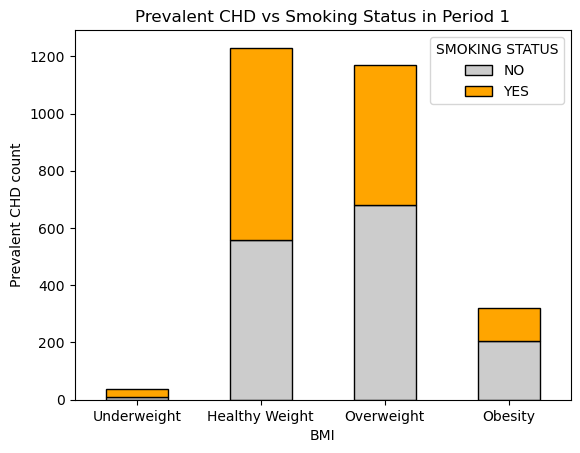

In [78]:
# Create bar chart, x = BMI, y = prevalent CHD, and stacked columns divde smokers and non-smokers 
pivotP1_df.plot(kind='bar', stacked= True, 
                color= ('0.80', 'orange'), rot = 360, edgecolor = 'black')

plt.title('Prevalent CHD vs Smoking Status in Period 1')
plt.xlabel('BMI')
plt.ylabel('Prevalent CHD count')
plt.show()

In [79]:
# Create new DataFrame for Period 3 only 
bmiP3_df = bmi_df [bmi_df['PERIOD']==3]
bmiP1_df.head()

,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI,BMI CATEGORY
0,6238,F,250.0,46,NO,0,2,NO,1,28.73,Overweight
3,11263,F,228.0,43,NO,0,2,NO,1,30.30,Obesity
6,14367,M,260.0,52,NO,0,1,NO,1,26.36,Overweight
9,16365,M,225.0,43,YES,30,1,NO,1,23.61,Healthy Weight
12,23727,F,332.0,41,NO,0,3,NO,1,31.31,Obesity


In [80]:
# Creating a grouby by SMOKING STATUS and BMI
groupedP3_df = bmiP3_df.groupby(['SMOKING STATUS', 'BMI CATEGORY'])['PREVALENT CHD'].count().reset_index()
groupedP3_df

,SMOKING STATUS,BMI CATEGORY,PREVALENT CHD
0,NO,Underweight,24
1,NO,Healthy Weight,704
2,NO,Overweight,813
3,NO,Obesity,279
4,YES,Underweight,18
5,YES,Healthy Weight,471
6,YES,Overweight,354
7,YES,Obesity,91


In [81]:
# Pivot the SMOKING STATUS column, set BMI as index 
pivotP3_df = groupedP3_df.pivot(index = 'BMI CATEGORY', columns = 'SMOKING STATUS', values= 'PREVALENT CHD')
pivotP3_df

SMOKING STATUS,NO,YES
BMI CATEGORY,,
Underweight,24,18
Healthy Weight,704,471
Overweight,813,354
Obesity,279,91


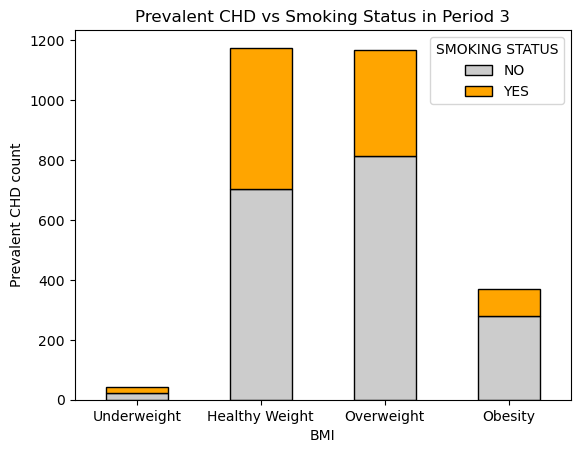

In [82]:
# Create bar chart, x = BMI, y = prevalent CHD, and stacked columns divde smokers and non-smokers 
pivotP3_df.plot(kind='bar', stacked= True, 
                color= ('0.80', 'orange'), rot = 360, edgecolor = 'black')

plt.title('Prevalent CHD vs Smoking Status in Period 3')
plt.xlabel('BMI')
plt.ylabel('Prevalent CHD count')
plt.show()